# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | zaozerne
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | gravdal
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | evanton
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | rosa zarate
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | cam ranh
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | maragogi
Processing Record 21 of Set 1 | road town
Processing Record 22 of Set 1 | kapaa
Processing Record 23

Processing Record 37 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 38 of Set 4 | saleaula
City not found. Skipping...
Processing Record 39 of Set 4 | novominskaya
Processing Record 40 of Set 4 | pandan
Processing Record 41 of Set 4 | goundi
Processing Record 42 of Set 4 | mocuba
Processing Record 43 of Set 4 | skibbereen
Processing Record 44 of Set 4 | matinhos
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 0 of Set 5 | newport
Processing Record 1 of Set 5 | lulea
Processing Record 2 of Set 5 | mbalmayo
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | lac du bonnet
Processing Record 5 of Set 5 | vanavara
Processing Record 6 of Set 5 | lourdes
Processing Record 7 of Set 5 | outlook
Processing Record 8 of Set 5 | aykhal
Processing 

Processing Record 25 of Set 8 | high level
Processing Record 26 of Set 8 | norman wells
Processing Record 27 of Set 8 | poum
Processing Record 28 of Set 8 | tomakomai
Processing Record 29 of Set 8 | gari
Processing Record 30 of Set 8 | port hardy
Processing Record 31 of Set 8 | hambantota
Processing Record 32 of Set 8 | suez
Processing Record 33 of Set 8 | vostok
Processing Record 34 of Set 8 | issenye
Processing Record 35 of Set 8 | pitsunda
Processing Record 36 of Set 8 | marzuq
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | tucumcari
Processing Record 39 of Set 8 | miahuatlan
Processing Record 40 of Set 8 | westport
Processing Record 41 of Set 8 | nouadhibou
Processing Record 42 of Set 8 | holland
Processing Record 43 of Set 8 | khudumelapye
Processing Record 44 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 45 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 8 | iralaya
Processing Record 47 of Set 8 | til

Processing Record 14 of Set 12 | solnechnyy
Processing Record 15 of Set 12 | verkhnyaya maksakovka
Processing Record 16 of Set 12 | kuznechikha
Processing Record 17 of Set 12 | abu dhabi
Processing Record 18 of Set 12 | guayaramerin
Processing Record 19 of Set 12 | paamiut
Processing Record 20 of Set 12 | srednekolymsk
Processing Record 21 of Set 12 | seoul
Processing Record 22 of Set 12 | sibolga
Processing Record 23 of Set 12 | nortelandia
Processing Record 24 of Set 12 | northam
Processing Record 25 of Set 12 | talara
Processing Record 26 of Set 12 | inhambane
Processing Record 27 of Set 12 | bako
Processing Record 28 of Set 12 | troitsko-pechorsk
Processing Record 29 of Set 12 | kalianget
Processing Record 30 of Set 12 | dzilam gonzalez
Processing Record 31 of Set 12 | egvekinot
Processing Record 32 of Set 12 | adelaide
Processing Record 33 of Set 12 | taft
Processing Record 34 of Set 12 | hualmay
Processing Record 35 of Set 12 | dianopolis
City not found. Skipping...
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naze,28.3667,129.4833,67.12,88,97,14.07,JP,1670205341
1,zaozerne,45.1582,33.2787,36.73,82,57,24.27,UA,1670205342
2,atuona,-9.8000,-139.0333,77.61,79,18,19.28,PF,1670205342
3,gravdal,68.1214,13.5031,43.45,85,100,26.60,NO,1670205342
4,bluff,-46.6000,168.3333,50.81,67,100,2.71,NZ,1670205277


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,67.12,88,97,14.07,JP,1670205341
1,zaozerne,45.1582,33.2787,36.73,82,57,24.27,UA,1670205342
2,atuona,-9.8000,-139.0333,77.61,79,18,19.28,PF,1670205342
3,gravdal,68.1214,13.5031,43.45,85,100,26.60,NO,1670205342
4,bluff,-46.6000,168.3333,50.81,67,100,2.71,NZ,1670205277


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-squared is: 0.576


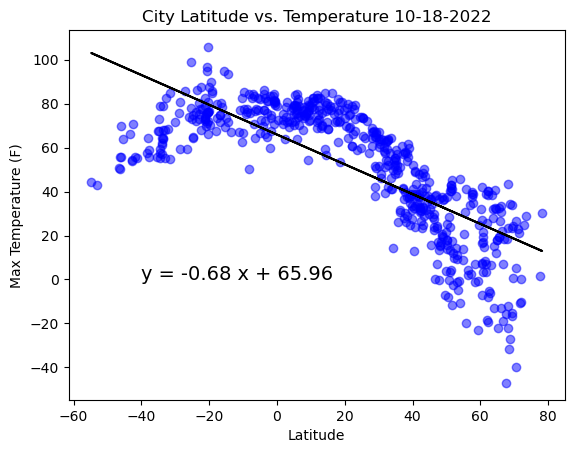

In [11]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, max_temp)
regress_values = lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, max_temp, marker ="o", color="blue", alpha = 0.5)
plt.plot(lat, regress_values, color="black")
plt.annotate(line_eq,(-40,0), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature 10-18-2022")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-squared is: 0.048


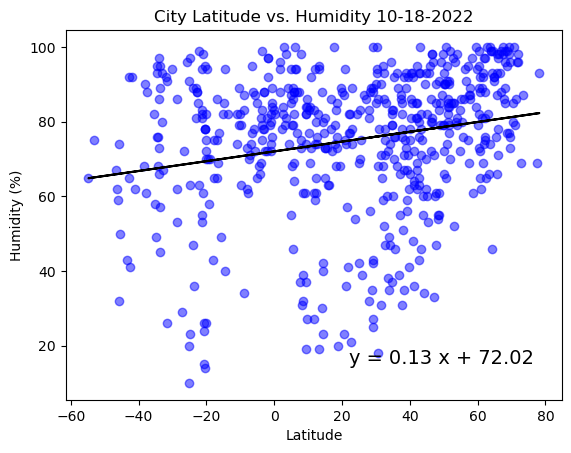

In [14]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, humidity, marker="o", color="blue", alpha = 0.5)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(22,15), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 10-18-2022")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-squared is: 0.029


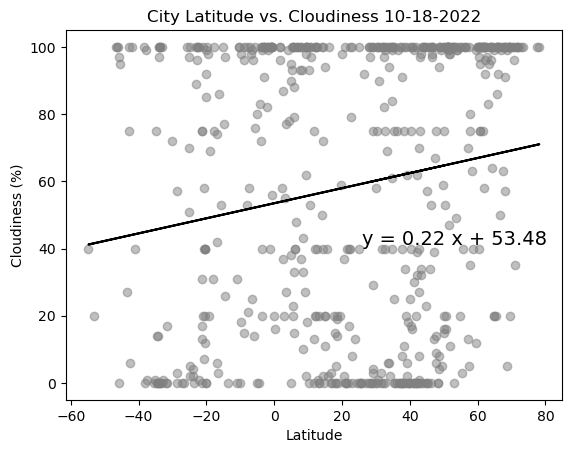

In [19]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, cloudiness, marker="o", color="gray", alpha = 0.5)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(26,41), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 10-18-2022")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-squared is: 0.004


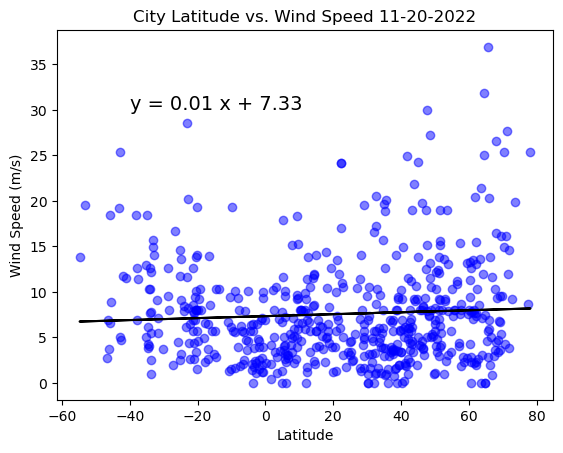

In [21]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind_speed)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, wind_speed, marker="o", color="blue", alpha = 0.5)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(-40,30), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 11-20-2022")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,67.12,88,97,14.07,JP,1670205341
1,zaozerne,45.1582,33.2787,36.73,82,57,24.27,UA,1670205342
3,gravdal,68.1214,13.5031,43.45,85,100,26.60,NO,1670205342
7,evanton,57.6638,-4.3400,38.73,89,35,1.90,GB,1670205343
9,rosa zarate,0.3333,-79.4667,72.43,82,16,2.19,EC,1670205344


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atuona,-9.8000,-139.0333,77.61,79,18,19.28,PF,1670205342
4,bluff,-46.6000,168.3333,50.81,67,100,2.71,NZ,1670205277
5,rikitea,-23.1203,-134.9692,75.54,81,89,11.59,PF,1670205315
6,ushuaia,-54.8000,-68.3000,44.26,65,40,13.80,AR,1670205191
8,hermanus,-34.4187,19.2345,57.70,76,14,4.09,ZA,1670205316


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.741
y = -1.22 x + 88.92


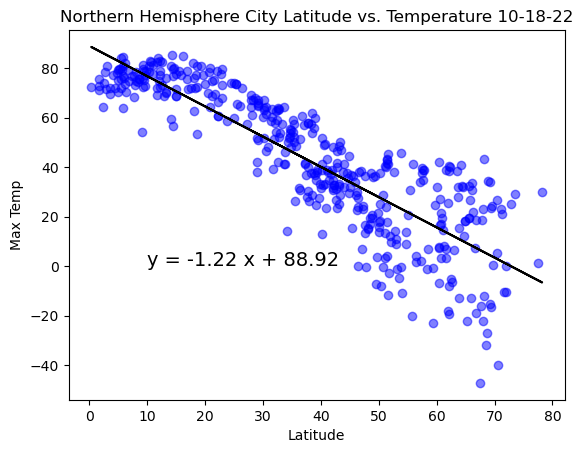

In [27]:
# Linear regression on Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_max_temp = northern_hemi_df["Max Temp"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(northern_lat, northern_max_temp)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_max_temp, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='black')
plt.annotate(line_eq,(10,0), fontsize=14)

plt.title("Northern Hemisphere City Latitude vs. Temperature 10-18-22")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)


plt.savefig("../output_data/fig5.png")

plt.show()

The r-squared is: 0.283
y = 0.43 x + 81.51


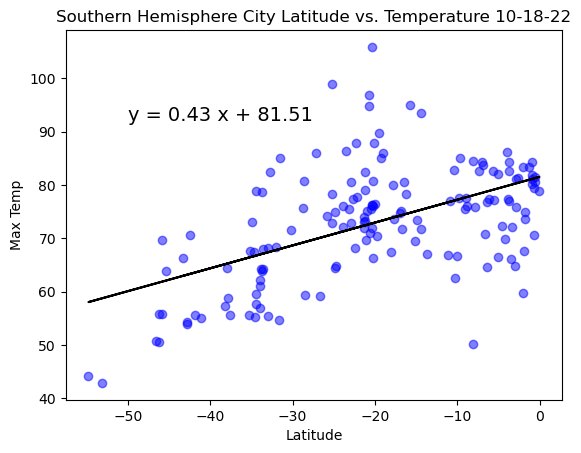

In [33]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_max_temp = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_max_temp)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_max_temp, marker="o", color="blue", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='black')
plt.annotate(line_eq,(-50,92), fontsize=14, color='black')

plt.title("Southern Hemisphere City Latitude vs. Temperature 10-18-22")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

plt.savefig("../output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** The closer to equater the temperature is higher. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07
y = 0.25 x + 66.67


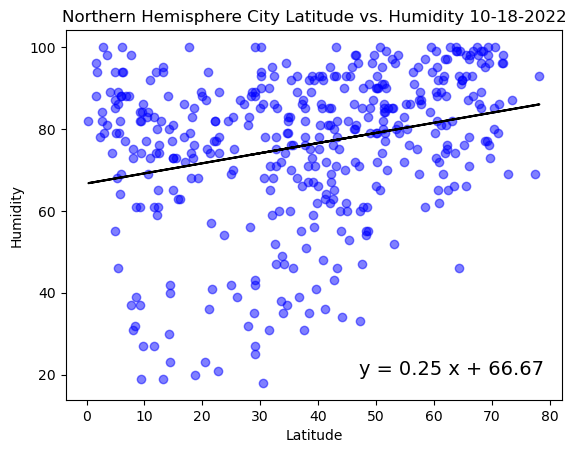

In [34]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_humidity = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_humidity, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='black')
plt.annotate(line_eq,(47,20), fontsize=14, color='black')


plt.title("Northern Hemisphere City Latitude vs. Humidity 10-18-2022")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

plt.savefig("../output_data/Fig7.png")

plt.show()

The r-squared is: 0.04
y = 0.29 x + 77.91


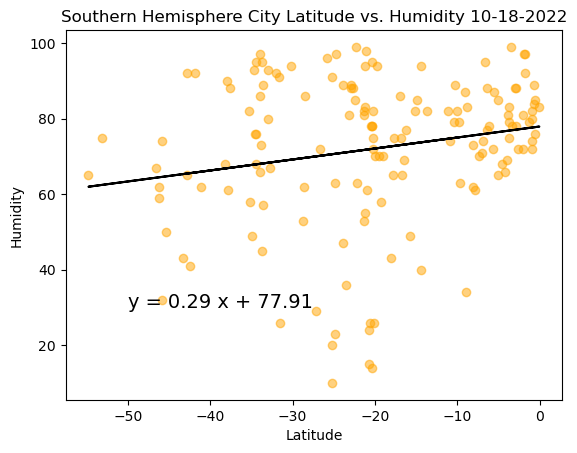

In [35]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_humidity = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_humidity, marker="o", color="orange", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='black')
plt.annotate(line_eq,(-50,30), fontsize=14, color='black')

plt.title("Southern Hemisphere City Latitude vs. Humidity 10-18-2022")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

plt.savefig("../output_data/Fig8.png")

plt.show()



**Discussion about the linear relationship:** There is posotive correlation in both northern and southern hemispheres between the latitude and the humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.064
y = 0.52 x + 39.49


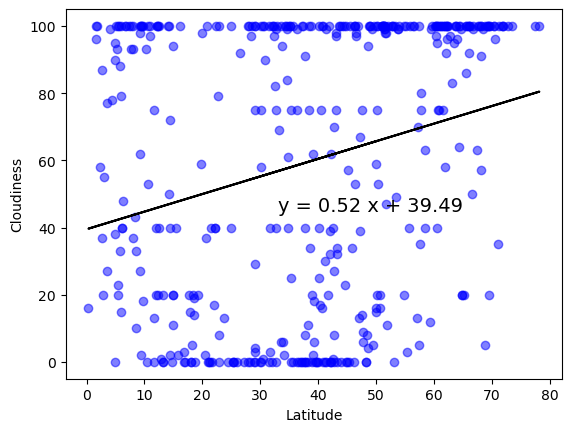

In [37]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_cloudiness, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='black')
plt.annotate(line_eq,(33,45), fontsize=14, color='black')


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

plt.savefig("../output_data/Fig9.png")

plt.show()

The r-squared is: 0.062
y = 0.76 x + 71.62


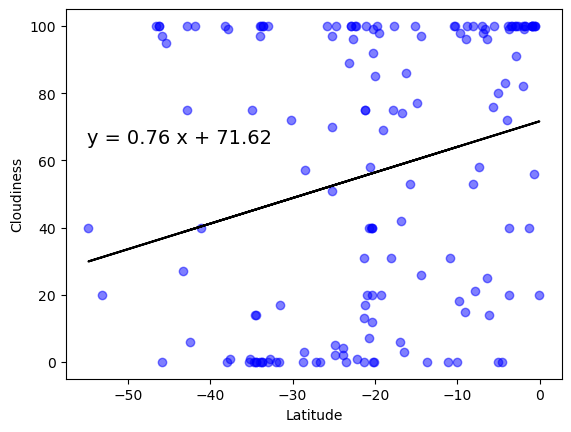

In [40]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_cloudiness, marker="o", color="blue", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='black')
plt.annotate(line_eq,(-55,65), fontsize=14, color='black')


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)


plt.savefig("../output_data/Fig10.png")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.046
y = 0.06 x + 5.19


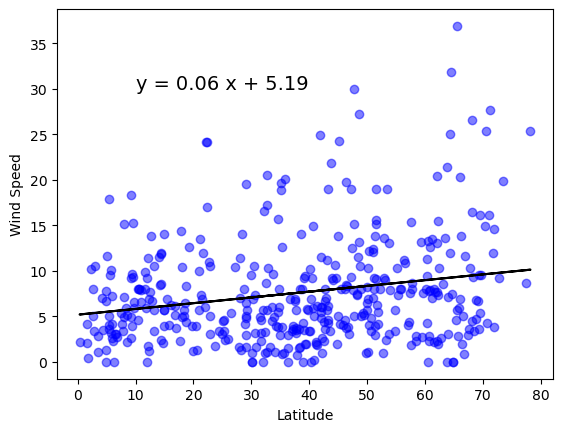

In [41]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_wind_speed = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind_speed)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_wind_speed, marker="o", color="blue", alpha = 0.5)
plt.plot(northern_lat, regress_values, color='black')
plt.annotate(line_eq,(10,30), fontsize=14, color='black')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

plt.savefig("../output_data/Fig11.png")

plt.show()

The r-squared is: 0.179
y = -0.16 x + 4.38


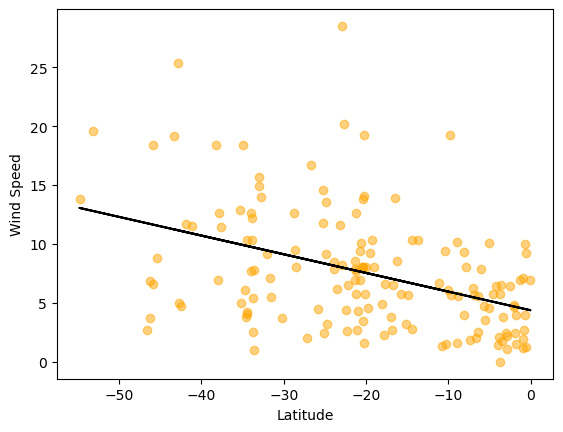

In [43]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_wind_speed = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind_speed)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_wind_speed, marker="o", color="orange", alpha = 0.5)
plt.plot(southern_lat, regress_values, color='black')
plt.annotate(line_eq,(-20,30), fontsize=14, color='black')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)


plt.savefig("../output_data/Fig12.png")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE